<a href="https://colab.research.google.com/github/mobadara/fashion-mnist-pytorch-cnn/blob/main/fashion-mnist-cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion MNIST Classification with PyTorch CNN**

Welcome to this project where we'll dive into the world of image classification using the Fashion MNIST dataset and PyTorch! This project serves as a practical demonstration of my recently acquired PyTorch skills, focusing on building and training a Convolutional Neural Network (CNN) to accurately classify different fashion items.

The Fashion MNIST dataset, a drop-in replacement for the classic MNIST dataset, comprises grayscale images of 70,000 fashion products from 10 categories, with 7,000 images per category. We will leverage the power of CNNs, which are particularly well-suited for image data, to learn the intricate patterns within these images and predict their corresponding fashion labels.

**Let's begin by setting up our environment and loading the dataset using PyTorch's `torchvision` library.**

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset
The train and test dataset is loaded below, and it returns a `TensorDataset` object.

In [2]:
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 334kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.25MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.5MB/s]


### **Insights**

In [3]:
print(f'Train dataset size: {len(train_dataset)}')
print(f'Test dataset size: {len(test_dataset)}')

Train dataset size: 60000
Test dataset size: 10000


In [4]:
print(f'Train dataset shape: {train_dataset[0][0].shape}')
print(f'Test dataset shape: {test_dataset[0][0].shape}')

Train dataset shape: torch.Size([1, 28, 28])
Test dataset shape: torch.Size([1, 28, 28])


In [14]:
# Example Labels
print(f'First Train Data Label: {train_dataset[0][1]}')
print(f'FirstTest Data label: {test_dataset[0][1]}')

First Train Data Label: 9
FirstTest Data label: 9


In [17]:
train_dataset.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

The dataset contains **7000** examples in total, where **6000** examples are in the train set, and the remaining **1000** are in the test set. Each example contains an a greyscale (1 channel), $28 \times 28$ pixels image of a fashion product and a label indicating the category of the fashion product whose image is given.

Let's visualize the first six example in the train set with its corresponding label.

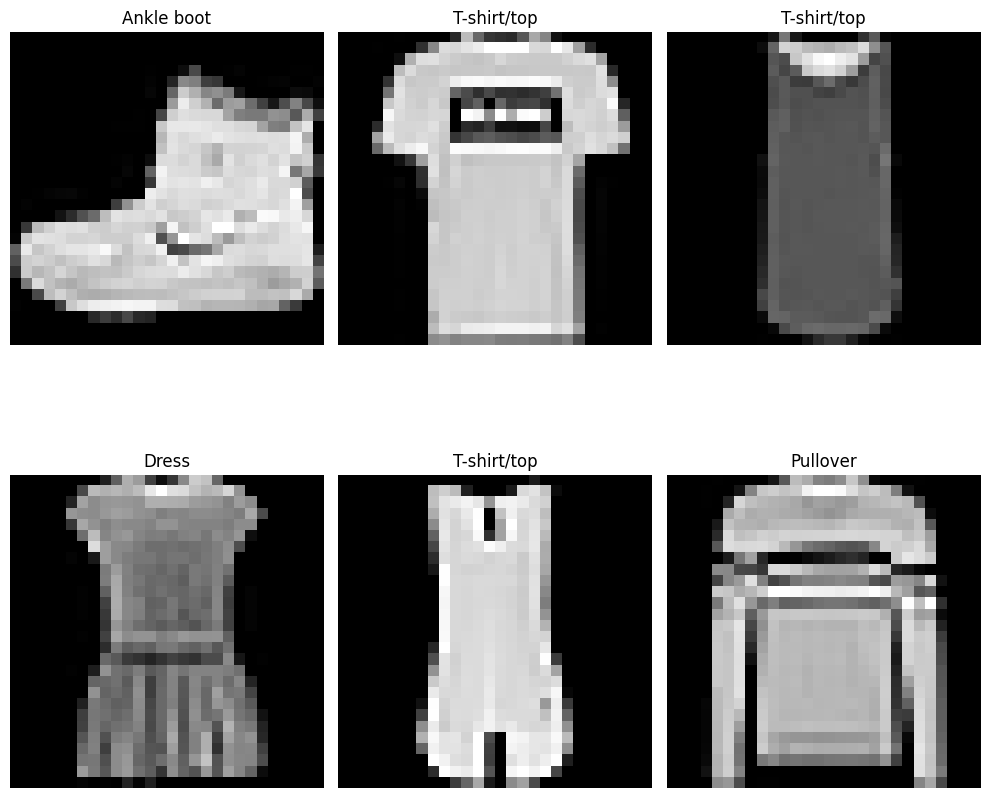

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(10, 10))
for i in range(6):
    ax = axs[i//3, i%3]
    ax.imshow(train_dataset[i][0].permute(1, 2, 0), cmap='gray')
    label_index = train_dataset[i][1]
    label_name = train_dataset.classes[label_index]
    ax.set_title(label_name)
    ax.axis('off')
plt.tight_layout()
plt.show()

As seen in the six examples in the picture, we have a sense of what the dataset looks like.

Our goal is to develop a Deep Learning Model using PyTorch Convolutional Neural Network to classify unseen images of fashion product into its correct category. The model will be useful for fashion stores and to augment other computer vision models that sense their environments. Example, a models that identifies the kind of derss an individual is wearing.